# Mini Project 2

The project includes several key steps: data cleaning, exploratory data analysis (EDA), data transformation, hypothesis testing, and the preparation of data for machine learning (ML) models. The ultimate goal is to apply a variety of regression models, analyze their performance, and interpret the results. Additionally, we'll include deep learning approaches such as an Artificial Neural Network (ANN) and a model incorporating 1D convolutional layers followed by ANN layers.

## Importing Necessary Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats

# A. Dataset Selection and Initial Overview
Choosing a tough dataset is crucial for this project. A "tough" dataset might have characteristics such as:

### High dimensionality: 
Numerous features that can lead to issues like multicollinearity.
### Non-linear relationships: 
The relationship between the independent and dependent variables is not linear.
### Noise: 
Presence of outliers and irrelevant features.
### Missing data:
Missing values that need to be imputed or otherwise handled.
### Imbalanced data: 
A regression problem where certain ranges of the target variable are underrepresented.

<br>So I Have Choosen **California Housing Dataset** for this project.

## Load the dataset


In [2]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

## Display the first 5 rows


In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Display information about the dataset


In [4]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Display summary statistics


In [5]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# B. Data Cleaning
Data cleaning is a crucial step, as the quality of the data directly impacts model performance.

## Check for missing values


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## Separate numeric and categorical columns


In [9]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

## Impute missing values for numeric columns

In [10]:
numeric_imputer = SimpleImputer(strategy='median')
df_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(df[numeric_columns]), columns=numeric_columns, index=df.index)

## Verify that missing values have been successfully imputed


In [11]:
print("\nMissing Values after Imputation:")
print(df_numeric_imputed.isnull().sum())


Missing Values after Imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


## Handle categorical column (assuming 'ocean_proximity' is the only categorical column)


In [12]:
df_categorical = df[categorical_columns].copy()
df_categorical['ocean_proximity'].fillna(df_categorical['ocean_proximity'].mode()[0], inplace=True)

/tmp/ipykernel_36/159072684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical['ocean_proximity'].fillna(df_categorical['ocean_proximity'].mode()[0], inplace=True)


## Convert categorical data to numerical


In [13]:
label_encoder = LabelEncoder()
df_categorical['ocean_proximity'] = label_encoder.fit_transform(df_categorical['ocean_proximity'])

## Combine numeric and categorical data


In [14]:
df_imputed = pd.concat([df_numeric_imputed, df_categorical], axis=1)

# C. Exploratory Data Analysis (EDA)
EDA is an iterative process of investigating the data to discover patterns, spot anomalies, and check assumptions

## a. Univariate Analysis

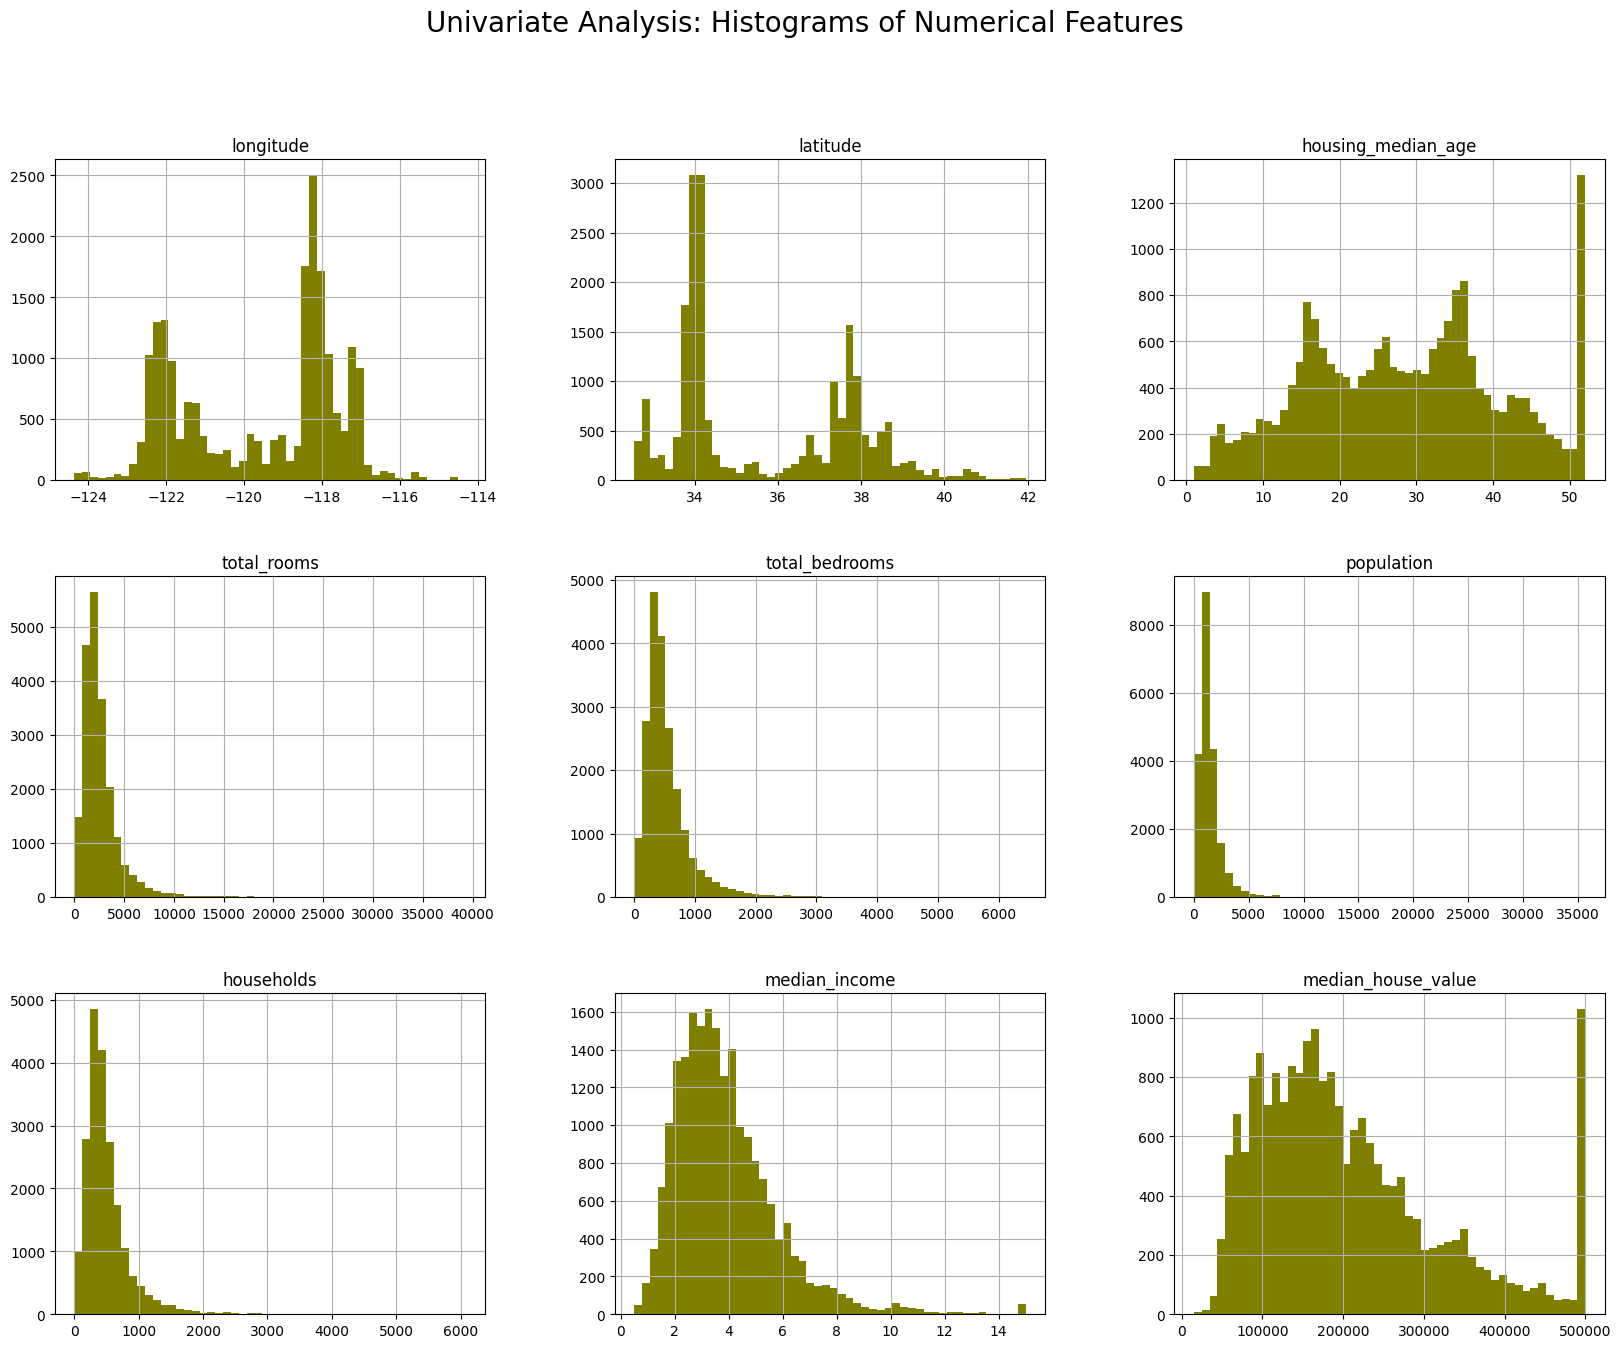

In [7]:
# Plot histograms for all numerical features
df.hist(bins=50, figsize=(20, 15), color='olive')
plt.suptitle('Univariate Analysis: Histograms of Numerical Features', fontsize=20)
plt.show()

The provided image showcases histograms of several numerical features from a dataset. Histograms are a graphical representation of the distribution of a numerical variable, showing the frequency of data points within specific intervals or bins.

## Key Observations:

### Distribution Shapes:

#### 1. Skewness:
##### Right-skewed: 
Features like total_rooms, total_bedrooms, population, households, and median_house_value show a right-skewed distribution, meaning there are more data points on the lower end of the scale with a longer tail on the right.
##### Left-skewed: 
The median_income feature appears slightly left-skewed, with a longer tail on the left side.
##### Symmetric: 
The longitude and latitude features exhibit a relatively symmetric distribution, indicating a fairly balanced spread of data points around the center.
##### Bimodal: 
The housing_median_age histogram suggests a bimodal distribution, with two distinct peaks, possibly indicating two common age groups for houses in the dataset.

#### 2. Range and Outliers:

##### Range: 
The range of values for each feature can be observed from the x-axis. For example, longitude values range from approximately -124 to -114, while median_house_value values span from 0 to 500,000.
##### Outliers: 
While not explicitly visible in the histograms, extreme values (outliers) might be present, especially in features with long tails (e.g., median_house_value).

#### 3. Frequency:

##### Frequency: 
The y-axis of each histogram represents the frequency (or count) of data points within each bin. The taller the bar, the more data points fall within that bin.
##### Inferences:

###### Data Concentration: 
The longitude and latitude histograms show a concentration of data points around specific geographic regions.
###### Housing Characteristics: 
The distributions of total_rooms, total_bedrooms, population, and households suggest a wide range of housing sizes and occupancies, with a tendency towards larger houses and more people per household.
###### Income Distribution: 
The median_income histogram indicates a concentration of households in the lower to middle-income ranges, with fewer households in the higher-income brackets.
###### Housing Age: 
The bimodal distribution of housing_median_age might suggest two distinct periods of housing construction or renovation in the dataset.

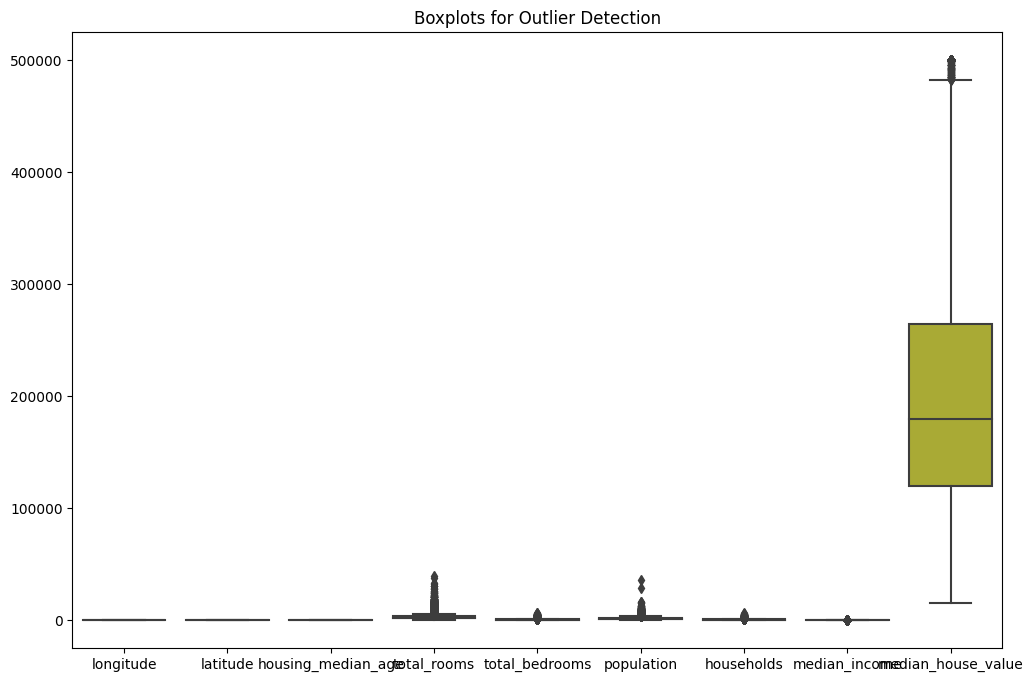

In [8]:
# Boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['ocean_proximity']))
plt.title('Boxplots for Outlier Detection')
plt.show()

Based on the provided boxplot, we conclude that:

### Data Distribution: 
The distribution of data for most features seems to be skewed to the right, as evidenced by the longer whiskers on the right side of the boxplots. This indicates that there are more extreme values on the higher end of the data.
### Outliers: 
There are a few outliers present in the data, primarily for the features "median_income" and "house_value." These outliers are visually apparent as individual points outside the whiskers.
### Feature Comparison: 
Comparing the boxplots for different features, we can see that some features have a wider range of values (larger IQR), while others have a more concentrated distribution (smaller IQR).

## b. Bivariate Analysis


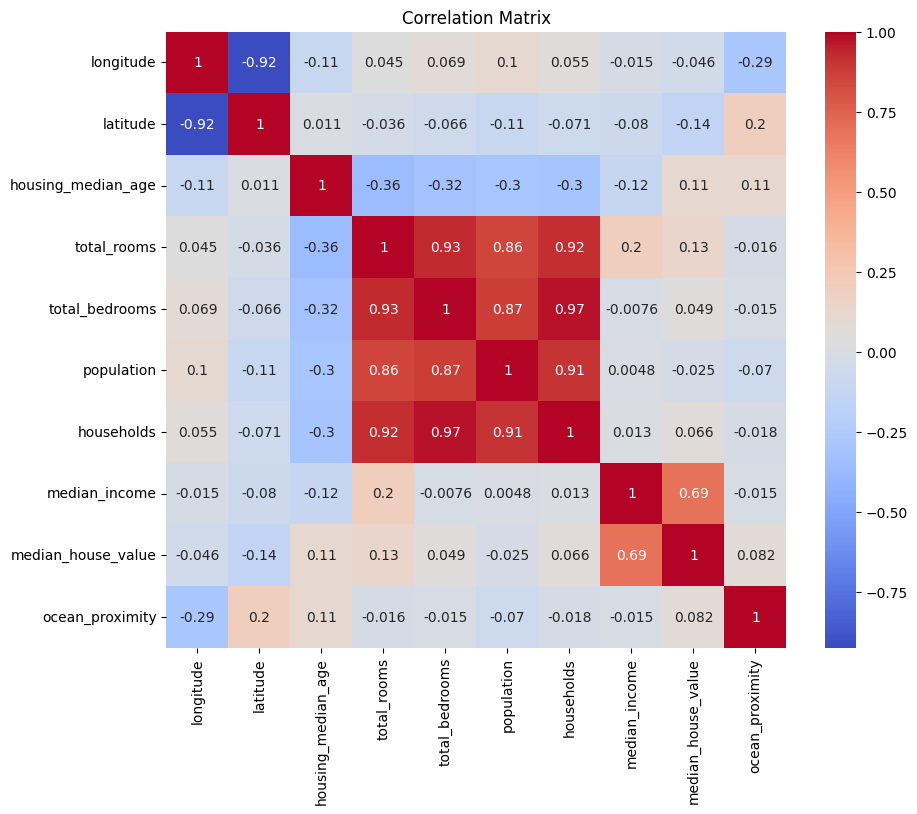

In [15]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This hetmap states that:
### Housing-Related Features: 
total_rooms, total_bedrooms, population, and households exhibit strong positive correlations with each other, suggesting that larger houses tend to have more rooms, bedrooms, and people.
### Geographic Features: 
longitude and latitude have a strong negative correlation, as expected, due to their geographic location.
### Income and Housing Value: 
median_income and median_house_value have a moderate positive correlation, indicating that higher-income areas tend to have higher-priced houses.
### Ocean Proximity: 
ocean_proximity has relatively weak correlations with most other features, suggesting that it might not be a strong predictor of housing values or other variables in the dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

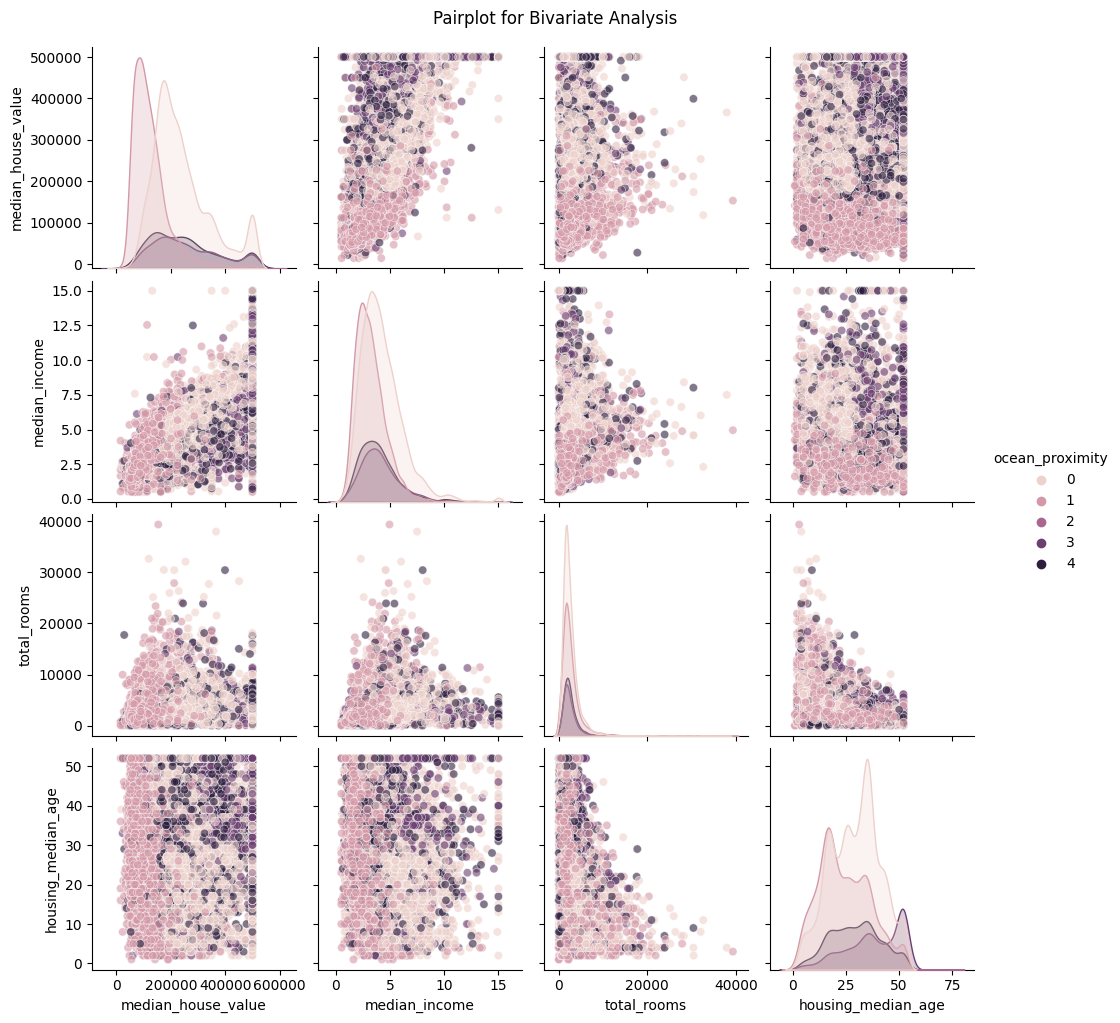

In [16]:
# Scatter plot matrix
sns.pairplot(df_imputed, vars=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age'], diag_kind='kde', plot_kws={'alpha': 0.6}, hue='ocean_proximity')
plt.suptitle('Pairplot for Bivariate Analysis', y=1.02)
plt.show()

This pairplot concludes that:
### Median Income and Median House Value: 
The scatter plot between these two variables shows a strong positive correlation, as expected. The histograms and KDE plots reveal that both variables have right-skewed distributions, indicating a concentration of data points on the lower end of the scale.
### Median Income and Total Rooms: 
The scatter plot shows a weak positive correlation, suggesting that higher incomes might be associated with larger houses. The histograms and KDE plots show that both variables have right-skewed distributions.
### Housing Median Age and Median House Value: 
The scatter plot shows a weak positive correlation, indicating that older houses might have higher median values. The histograms and KDE plots show that both variables have right-skewed distributions.
### Ocean Proximity: 
The color-coded points in the scatter plots represent different categories of ocean_proximity. This allows for visual exploration of how this categorical variable might influence the relationships between other numerical variables.

# D. Data Transformation
Transformation is applied to make the data more suitable for modeling.


In [17]:
# Log transformation of skewed features
df['total_rooms_log'] = np.log1p(df['total_rooms'])
df['population_log'] = np.log1p(df['population'])
df['households_log'] = np.log1p(df['households'])
df['total_bedrooms_log'] = np.log1p(df['total_bedrooms'])

In [18]:
# Convert 'ocean_proximity' to numerical values using Label Encoding
df['ocean_proximity_encoded'] = label_encoder.fit_transform(df['ocean_proximity'])

In [19]:
# Drop original columns that were transformed
df.drop(columns=['total_rooms', 'population', 'households', 'total_bedrooms', 'ocean_proximity'], inplace=True)

In [20]:
print("\nData after transformation and encoding:\n")
df.head()


Data after transformation and encoding:



,longitude,latitude,housing_median_age,median_income,median_house_value,total_rooms_log,population_log,households_log,total_bedrooms_log,ocean_proximity_encoded
0,-122.23,37.88,41.0,8.3252,452600.0,6.781058,5.777652,4.844187,4.867534,3
1,-122.22,37.86,21.0,8.3014,358500.0,8.867850,7.784057,7.037906,7.009409,3
2,-122.24,37.85,52.0,7.2574,352100.0,7.291656,6.208590,5.181784,5.252273,3
3,-122.25,37.85,52.0,5.6431,341300.0,7.150701,6.326149,5.393628,5.463832,3
4,-122.25,37.85,52.0,3.8462,342200.0,7.395108,6.338594,5.560682,5.638355,3


# E. Hypothesis Testing
Before moving on to modeling, hypothesis testing is conducted to understand the significance of the relationships between variables.

In [21]:
# Correlation significance testing
for col in df.columns:
    if col != 'median_house_value':
        corr, p_value = stats.pearsonr(df[col], df['median_house_value'])
        print(f"Correlation between {col} and median_house_value: {corr:.2f}, p-value: {p_value:.2e}")

Correlation between longitude and median_house_value: -0.05, p-value: 3.92e-11
Correlation between latitude and median_house_value: -0.14, p-value: 2.94e-96
Correlation between housing_median_age and median_house_value: 0.11, p-value: 2.76e-52
Correlation between median_income and median_house_value: 0.69, p-value: 0.00e+00
Correlation between total_rooms_log and median_house_value: 0.16, p-value: 1.48e-117
Correlation between population_log and median_house_value: -0.02, p-value: 2.31e-03
Correlation between households_log and median_house_value: 0.07, p-value: 3.34e-26
Correlation between total_bedrooms_log and median_house_value: nan, p-value: nan
Correlation between ocean_proximity_encoded and median_house_value: 0.08, p-value: 6.00e-32


## Values Analysis:
### Strongest Correlation: 
The feature median_income has the strongest positive correlation with median_house_value, indicating a strong relationship between income and housing prices.
### Significant Correlations: 
Several other features, including total_rooms_log, households_log, housing_median_age, and ocean_proximity_encoded, also have significant correlations with median_house_value, suggesting that these factors are important predictors of housing prices.
### Weak Correlations: 
longitude, latitude, and population_log have relatively weak correlations with median_house_value, indicating that these features might not be strong predictors.

# F. Model Preparation and Training
The dataset is now ready for modeling. We will start with baseline models and progressively move to more complex ones.

## Separate features and target


In [22]:
X = df_imputed.drop('median_house_value', axis=1)
y = df_imputed['median_house_value']

## Split the data into training and testing sets


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the features


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression
## Assumptions: 
Ensure that the assumptions of linear regression (linearity, independence, homoscedasticity, normality of errors) are checked.
## Metrics: 
R-squared, Adjusted R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE), Accuracy, Precision,Recall, F1 Score.

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
y_test_binary_lr = (y_test > y_test.median()).astype(int)
y_pred_binary_lr = (y_pred_lr > y_test.median()).astype(int)
accuracy_lr = accuracy_score(y_test_binary_lr, y_pred_binary_lr)
precision_lr = precision_score(y_test_binary_lr, y_pred_binary_lr)
recall_lr = recall_score(y_test_binary_lr, y_pred_binary_lr)
f1_lr = f1_score(y_test_binary_lr, y_pred_binary_lr)

print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-squared Score: {r2_lr}")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")


Linear Regression Results:
Mean Squared Error: 5062019613.457126
Mean Absolute Error: 51820.7481502621
R-squared Score: 0.6137068886499535
Accuracy: 0.8059593023255814
Precision: 0.756394640682095
Recall: 0.9026162790697675
F1 Score: 0.8230616302186878


In [26]:
print("\nClassification Report:")
print(classification_report(y_test_binary_lr, y_pred_binary_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      2064
           1       0.76      0.90      0.82      2064

    accuracy                           0.81      4128
   macro avg       0.82      0.81      0.80      4128
weighted avg       0.82      0.81      0.80      4128



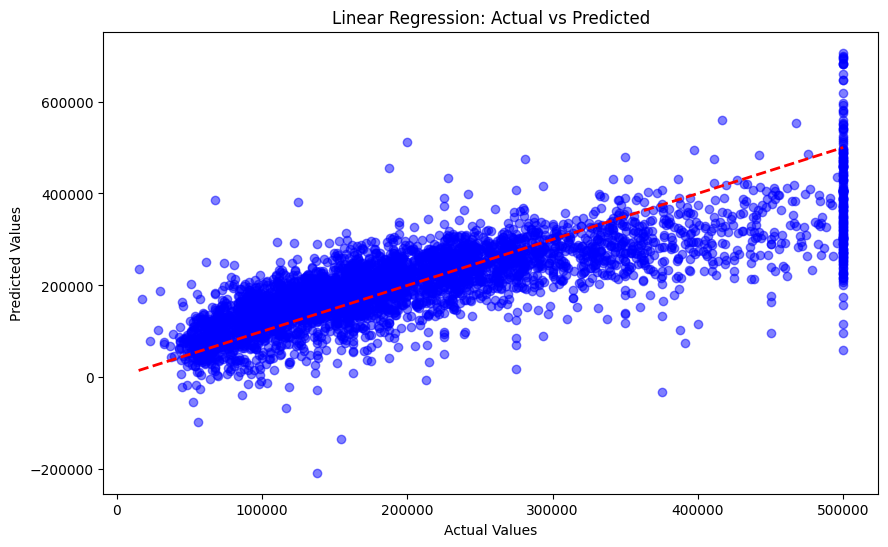

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color= 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# 2. Support Vector Regression
## Kernel Selection: 
Linear, Polynomial, or RBF kernel based on the nature of the data.
## Hyperparameter Tuning: 
Regularization parameter (C) and kernel-specific parameters.

In [28]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
y_test_binary_svr = (y_test > y_test.median()).astype(int)
y_pred_binary_svr = (y_pred_svr > y_test.median()).astype(int)
accuracy_svr = accuracy_score(y_test_binary_svr, y_pred_binary_svr)
precision_svr = precision_score(y_test_binary_svr, y_pred_binary_svr)
recall_svr = recall_score(y_test_binary_svr, y_pred_binary_svr)
f1_svr = f1_score(y_test_binary_svr, y_pred_binary_svr)

print("\nSupport Vector Regression Results:")
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared Score: {r2_svr}")
print(f"Accuracy: {accuracy_svr}")
print(f"Precision: {precision_svr}")
print(f"Recall: {recall_svr}")
print(f"F1 Score: {f1_svr}")


Support Vector Regression Results:
Mean Squared Error: 13682467744.250607
Mean Absolute Error: 87107.60870981064
R-squared Score: -0.044137209943267086
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


In [29]:
print("\nClassification Report:")
print(classification_report(y_test_binary_svr, y_pred_binary_svr))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2064
           1       0.50      1.00      0.67      2064

    accuracy                           0.50      4128
   macro avg       0.25      0.50      0.33      4128
weighted avg       0.25      0.50      0.33      4128



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


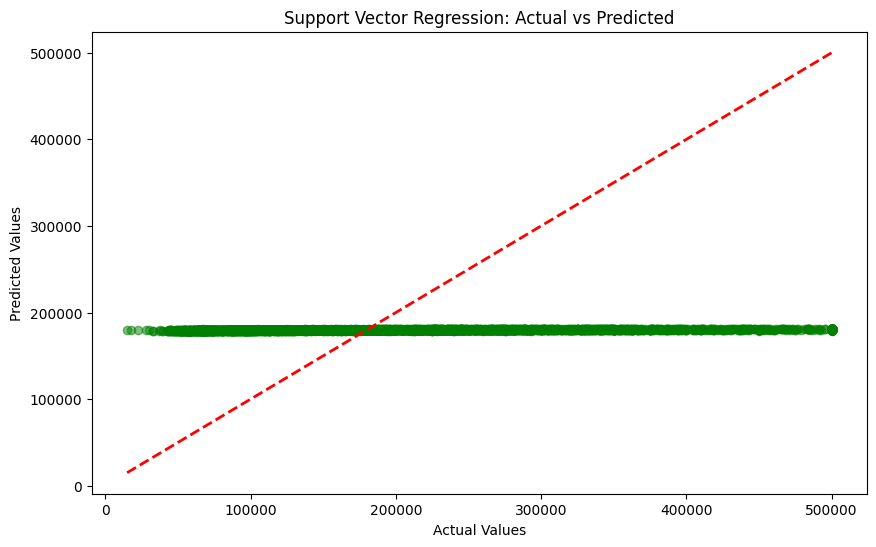

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color = 'green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Support Vector Regression: Actual vs Predicted")
plt.show()

# 3. Decision Tree Regression
## Overfitting Prevention: 
Use pruning, setting minimum samples per leaf, and limiting tree depth.
## Feature Importance: 
Identify which features the model considers most important.

In [31]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
y_test_binary_dt = (y_test > y_test.median()).astype(int)
y_pred_binary_dt = (y_pred_dt > y_test.median()).astype(int)
accuracy_dt = accuracy_score(y_test_binary_dt, y_pred_binary_dt)
precision_dt = precision_score(y_test_binary_dt, y_pred_binary_dt)
recall_dt = recall_score(y_test_binary_dt, y_pred_binary_dt)
f1_dt = f1_score(y_test_binary_dt, y_pred_binary_dt)

print("\nDecision Tree Regression Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared Score: {r2_dt}")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")


Decision Tree Regression Results:
Mean Squared Error: 4648508427.322675
Mean Absolute Error: 43407.60368217054
R-squared Score: 0.6452627763919279
Accuracy: 0.8531976744186046
Precision: 0.8570029382957884
Recall: 0.8478682170542635
F1 Score: 0.8524111056989772


In [32]:
print("\nClassification Report:")
print(classification_report(y_test_binary_dt, y_pred_binary_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2064
           1       0.86      0.85      0.85      2064

    accuracy                           0.85      4128
   macro avg       0.85      0.85      0.85      4128
weighted avg       0.85      0.85      0.85      4128



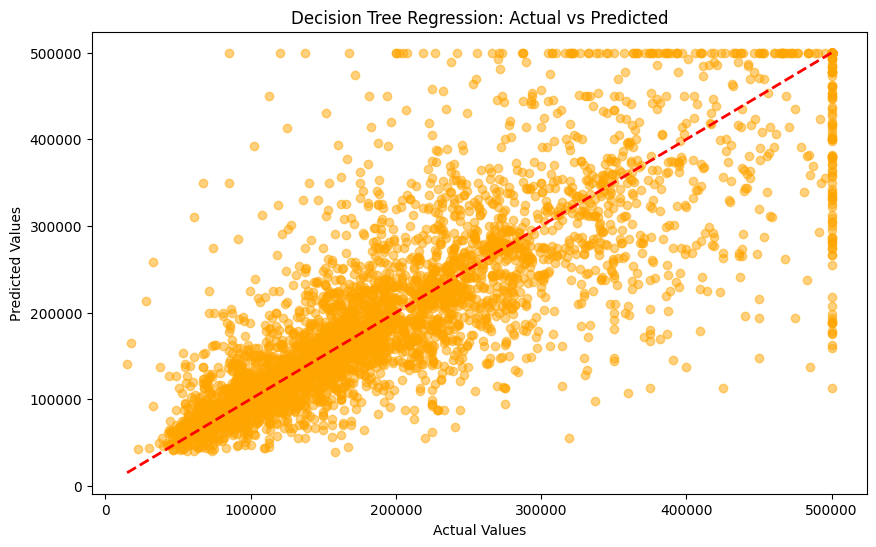

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color = 'orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()

# 4. Random Forest Regression
## Ensemble Method: 
Average the predictions from multiple trees to reduce variance.
## Feature Importance: 
Like decision trees, Random Forests can indicate the importance of each feature.

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
y_test_binary_rf = (y_test > y_test.median()).astype(int)
y_pred_binary_rf = (y_pred_rf > y_test.median()).astype(int)
accuracy_rf = accuracy_score(y_test_binary_rf, y_pred_binary_rf)
precision_rf = precision_score(y_test_binary_rf, y_pred_binary_rf)
recall_rf = recall_score(y_test_binary_rf, y_pred_binary_rf)
f1_rf = f1_score(y_test_binary_rf, y_pred_binary_rf)

print("\nRandom Forest Regression Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared Score: {r2_rf}")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")


Random Forest Regression Results:
Mean Squared Error: 2519948524.059238
Mean Absolute Error: 32143.641858042636
R-squared Score: 0.8076975535193577
Accuracy: 0.8875968992248062
Precision: 0.8613369467028004
Recall: 0.9239341085271318
F1 Score: 0.8915381019167836


In [35]:
print("\nClassification Report:")
print(classification_report(y_test_binary_rf, y_pred_binary_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2064
           1       0.86      0.92      0.89      2064

    accuracy                           0.89      4128
   macro avg       0.89      0.89      0.89      4128
weighted avg       0.89      0.89      0.89      4128



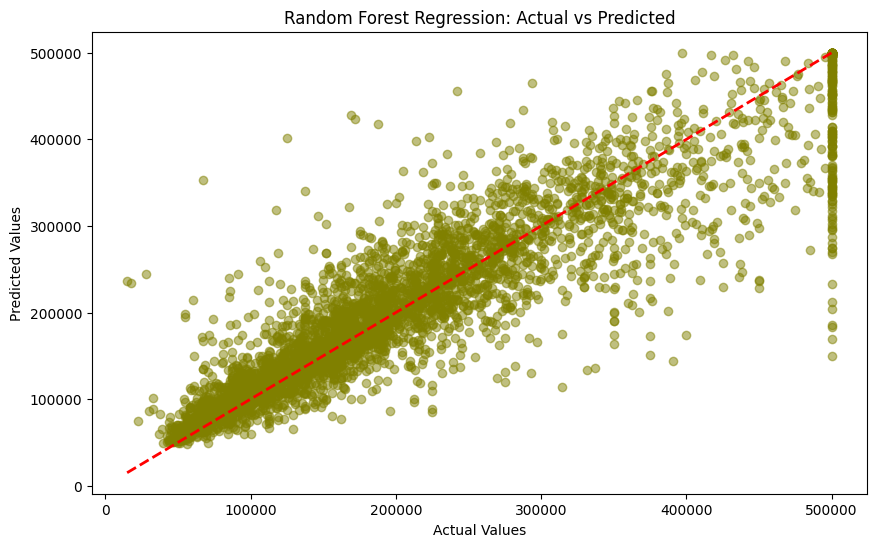

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color = 'olive')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

## Feature Importance for Random Forest


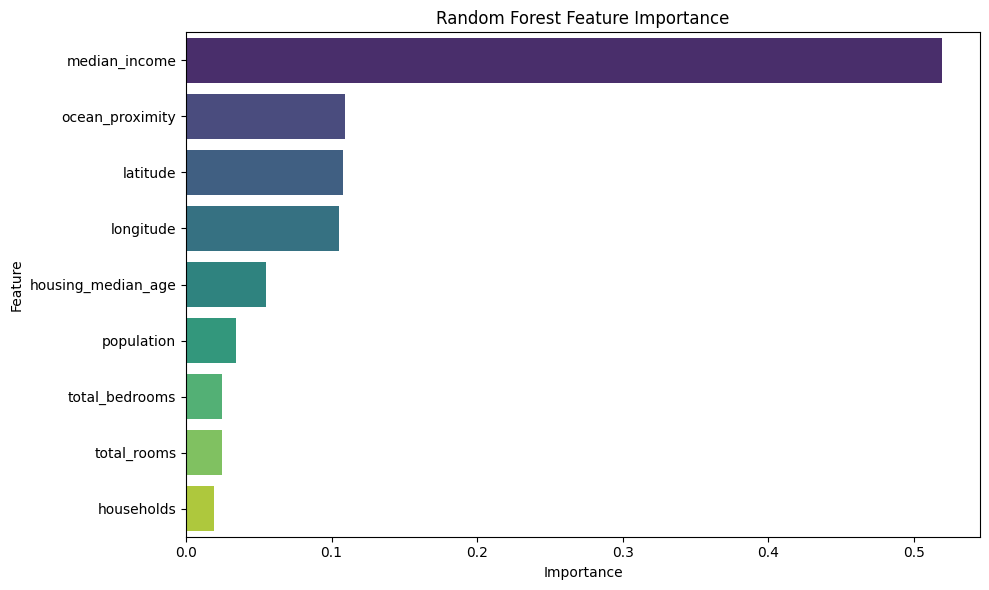

In [53]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 5. Gradient Boosting Regression
## Learning Rate and Number of Trees: 
Important hyperparameters to tune.
## Interpretability: 
Shapley values can help in understanding the contribution of each feature.

In [37]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
y_test_binary_gb = (y_test > y_test.median()).astype(int)
y_pred_binary_gb = (y_pred_gb > y_test.median()).astype(int)
accuracy_gb = accuracy_score(y_test_binary_gb, y_pred_binary_gb)
precision_gb = precision_score(y_test_binary_gb, y_pred_binary_gb)
recall_gb = recall_score(y_test_binary_gb, y_pred_binary_gb)
f1_gb = f1_score(y_test_binary_gb, y_pred_binary_gb)

print("\nGradient Boosting Regression Results:")
print(f"Mean Squared Error: {mse_gb}")
print(f"Mean Absolute Error: {mae_gb}")
print(f"R-squared Score: {r2_gb}")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")


Gradient Boosting Regression Results:
Mean Squared Error: 3165184483.1277027
Mean Absolute Error: 38646.576171904315
R-squared Score: 0.7584582725175874
Accuracy: 0.8471414728682171
Precision: 0.805543710021322
Recall: 0.9152131782945736
F1 Score: 0.8568836470855068


In [38]:
print("\nClassification Report:")
print(classification_report(y_test_binary_gb, y_pred_binary_gb))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      2064
           1       0.81      0.92      0.86      2064

    accuracy                           0.85      4128
   macro avg       0.85      0.85      0.85      4128
weighted avg       0.85      0.85      0.85      4128



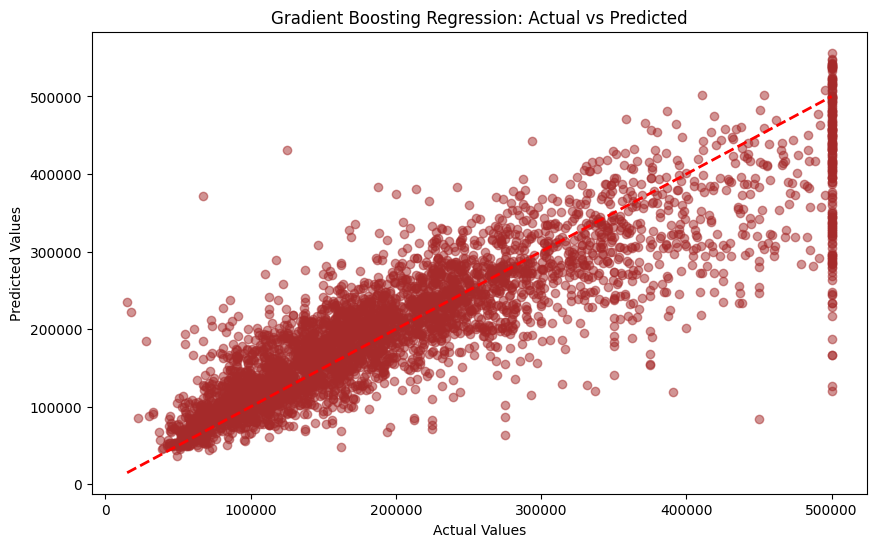

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color = 'brown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression: Actual vs Predicted")
plt.show()

## Function for ANN Model Creation

In [40]:
def create_ann_model(overfitting=True):
    if overfitting:
        model = Sequential([
            Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    else:
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1)
        ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

## Function for CNN Model Creation Followed By ANN Layers

In [41]:
def create_cnn_ann_model(overfitting=True):
    if overfitting:
        cnn_ann_model = Sequential([                                # create layers
            Input(shape=(X_train_scaled.shape[1], 1)), 
            Conv1D(64, kernel_size=2, activation='relu'), 
            MaxPooling1D(pool_size=1),  
            Conv1D(128, kernel_size=2, activation='relu'),
            MaxPooling1D(pool_size=1), 
            Flatten(),
            Dense(256, activation='relu'),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(1)
        ])                                 
    else:
        cnn_ann_model = Sequential([
            Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
            MaxPooling1D(pool_size=1),
            Conv1D(64, kernel_size=2, activation='relu'),
            MaxPooling1D(pool_size=1),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    cnn_ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # compile model using Adam Optimizer
    return cnn_ann_model

## Functions to Train and make Plots of Deep Learning Models

In [42]:
def train_and_plot(model, X_train, y_train, model_name, with_early_stopping=False):
    if with_early_stopping:
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
                            callbacks=[early_stopping], verbose=1)
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Learning Curves {"(with Early Stopping)" if with_early_stopping else ""}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plot_model(model, to_file=f'{model_name}_architecture.png', show_shapes=True, show_layer_names=True)
    img = plt.imread(f'{model_name}_architecture.png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{model_name} Architecture')
    plt.show()

# 1. ANN Model
## Architecture: 
Start with a simple architecture and progressively add more layers or neurons.
## Activation Functions: 
ReLU for hidden layers, Linear for output.
## Regularization: 
Use dropout and L2 regularization, early stoppings to prevent overfitting.
## Error Curve Analysis: 
Plot training and validation loss to check for overfitting or underfitting.

Training ANN:
Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 42247057408.0000 - val_loss: 7143789056.0000
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6387325952.0000 - val_loss: 5250430976.0000
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4898163712.0000 - val_loss: 4753053184.0000
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4718414336.0000 - val_loss: 4598376448.0000
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4235155712.0000 - val_loss: 4617129984.0000
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4148897536.0000 - val_loss: 4491552768.0000
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4189725440.0000 - val_loss: 4495147008.0000
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4208371456.0000 - val_loss: 4440010752.0000
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4011177216.0000 - val_loss: 4504022528.0000
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━

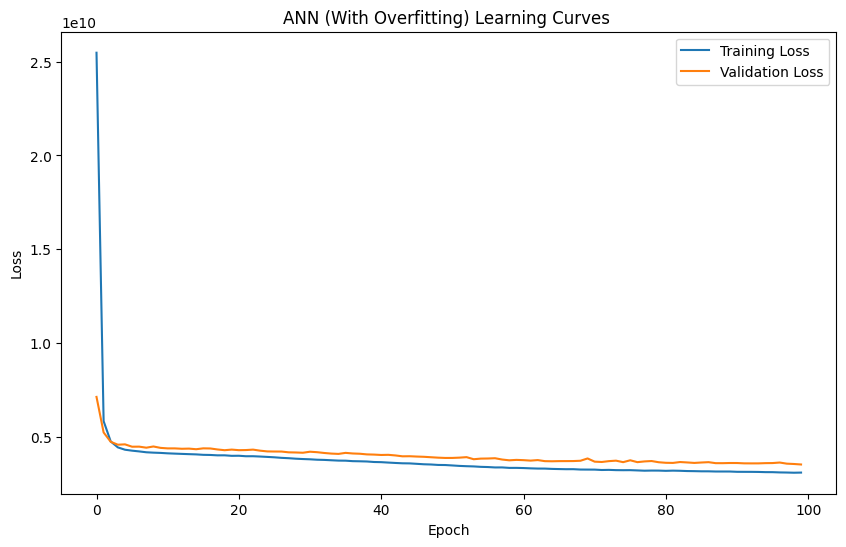

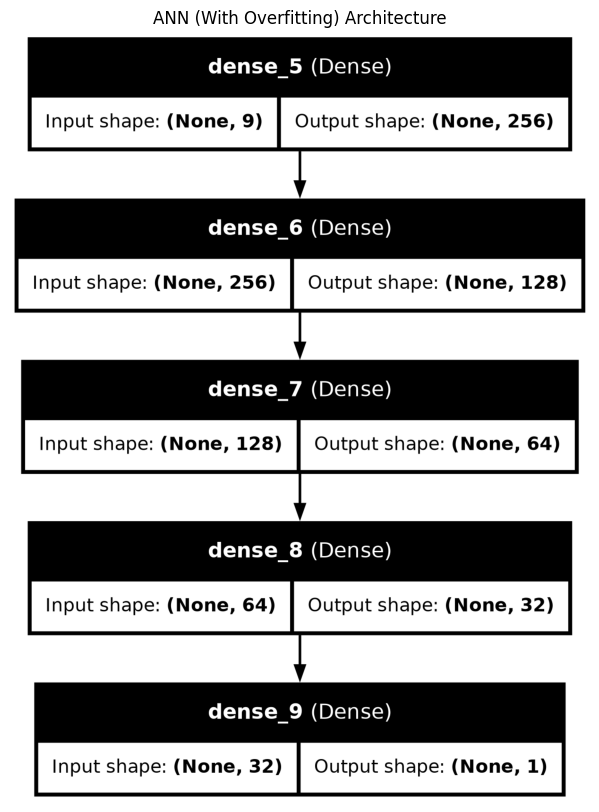

In [44]:
print("Training ANN:")
ann_model = create_ann_model(overfitting=True)
train_and_plot(ann_model, X_train_scaled, y_train, "ANN (With Overfitting)")

# Curves Analysis of ANN
## 1. Training loss continues to decrease: 
While the training loss is decreasing, it's still relatively high, indicating that the model could potentially learn more from the training data.
## 2. Validation loss plateaus or increases: 
The validation loss, which represents the model's performance on unseen data, has reached a plateau or even started to increase. This suggests that the model is learning patterns specific to the training data, but not generalizing well to new data.<br><br>
**Overfitting occurs when a model becomes too complex and starts to memorize the training data rather than learning underlying patterns. This can lead to poor performance on new, unseen data.**
<br><br>
To address overfitting, you might consider the following techniques:

### Regularization: 
Add a penalty term to the loss function to discourage the model from assigning large weights to individual features.
### Early stopping: 
Stop training when the validation loss starts to increase, even if the training loss is still decreasing.
### Data augmentation: 
Create additional training data by applying random transformations to existing data, which can help the model generalize better.
### Reduce model complexity: 
Simplify the model architecture by removing layers or reducing the number of neurons.<br>
By implementing these techniques, you can aim to improve the model's generalization performance and reduce overfitting.

## Evaluate ANN


In [45]:
y_pred_ann = ann_model.predict(X_test_scaled).flatten()
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
y_test_binary_ann = (y_test > y_test.median()).astype(int)
y_pred_binary_ann = (y_pred_ann > y_test.median()).astype(int)
accuracy_ann = accuracy_score(y_test_binary_ann, y_pred_binary_ann)

print("\nArtificial Neural Network Results:")
print(f"Mean Squared Error: {mse_ann}")
print(f"Mean Absolute Error: {mae_ann}")
print(f"R-squared Score: {r2_ann}")
print(f"Accuracy: {accuracy_ann}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Artificial Neural Network Results:
Mean Squared Error: 3364642369.2726145
Mean Absolute Error: 39378.80156145909
R-squared Score: 0.7432372316473801
Accuracy: 0.8548934108527132


# Handling Overfitting in ANN Model by Using Early Stoppings


Training ANN with Early Stopping to Prevent Overfitting:
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 55911522304.0000 - val_loss: 49320677376.0000
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39096700928.0000 - val_loss: 14327717888.0000
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12067112960.0000 - val_loss: 10034231296.0000
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9368555520.0000 - val_loss: 8320636928.0000
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7654790656.0000 - val_loss: 7178203136.0000
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6768962560.0000 - val_loss: 6417102336.0000
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6073786880.0000 - val_loss: 5897778176.0000
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5483345920.0000 - val_loss: 5531020800.0000
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5242310144.0000 - val_loss: 5276935168.0000
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

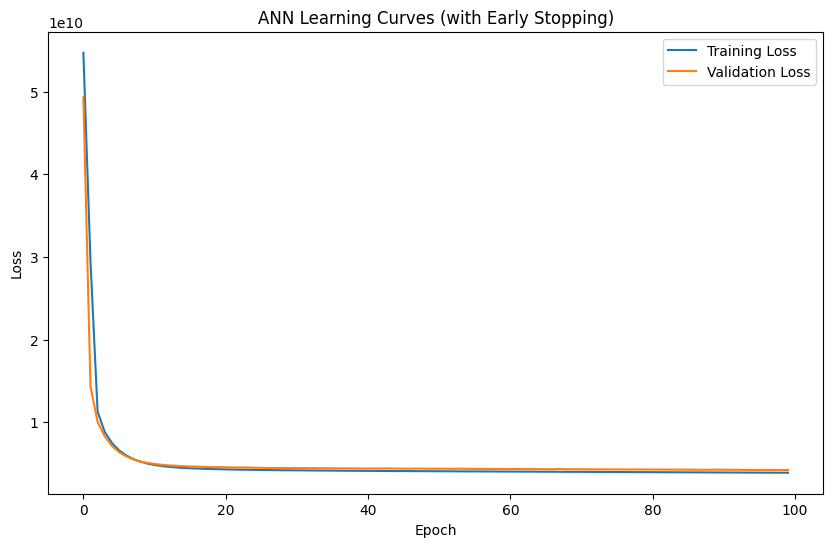

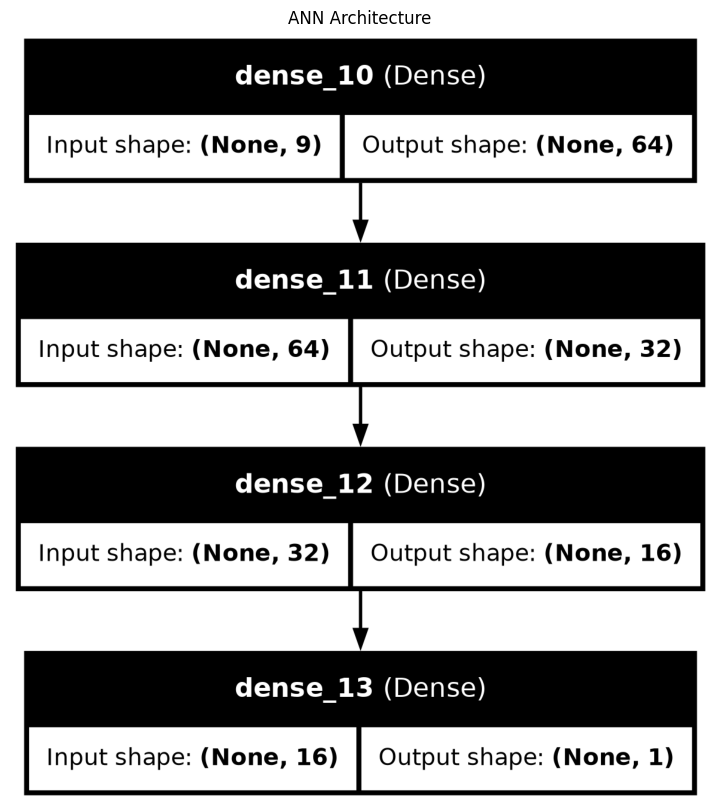

In [46]:
print("\nTraining ANN with Early Stopping to Prevent Overfitting:")
ann_model_early_stopping = create_ann_model(overfitting=False)
train_and_plot(ann_model_early_stopping, X_train_scaled, y_train, "ANN", with_early_stopping=True)

# 2. CNN+ANN Model
## 1D Convolutional Layers: 
Use 1D convolutional layers at the start to capture patterns in sequential data.
## Architecture: 
Convolutional layers followed by pooling layers, and then fully connected layers.
## Regularization: 
As with the ANN, use dropout. early stoppings and regularization.
## Error Curve Analysis: 
Similar to the standard ANN, analyze the error curves.

In [47]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


Training CNN+ANN:
Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 31242921984.0000 - val_loss: 7166364672.0000
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6464268288.0000 - val_loss: 5822918656.0000
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5508933120.0000 - val_loss: 5304261120.0000
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4951585792.0000 - val_loss: 5169202688.0000
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4605505024.0000 - val_loss: 4899609088.0000
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4667171840.0000 - val_loss: 4752837120.0000
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4426408960.0000 - val_loss: 4864647680.0000
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4257059584.0000 - val_loss: 4827624448.0000
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4124598272.0000 - val_loss: 4327293952.0000
Epoch 10/100
413/413 ━━━━━━━━━━━━━━

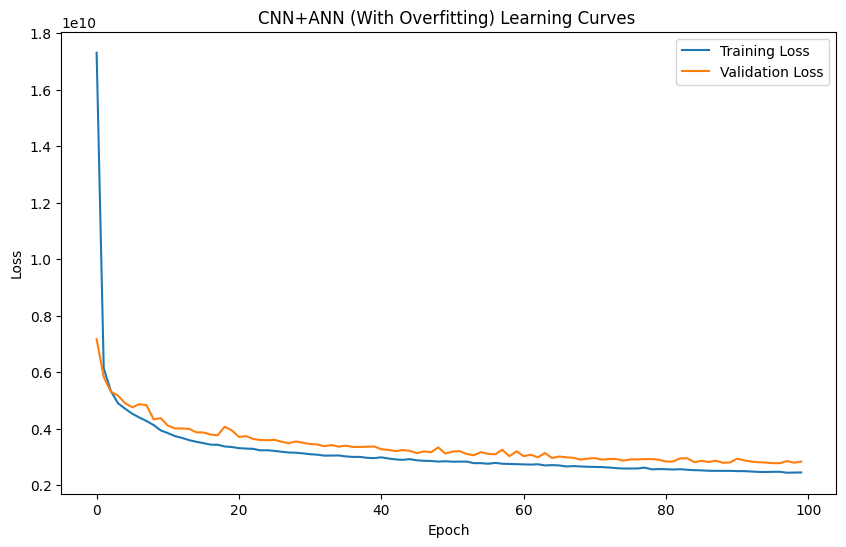

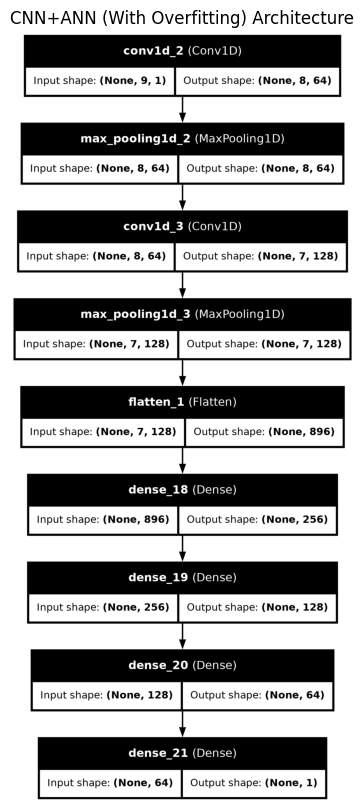

In [49]:
print("\nTraining CNN+ANN:")
cnn_ann_model = create_cnn_ann_model(overfitting=True)
train_and_plot(cnn_ann_model, X_train_cnn, y_train, "CNN+ANN (With Overfitting)")

# Curves Analysis of ANN + CNN
## 1. Training loss continues to decrease: 
While the training loss is decreasing, it's still relatively high, indicating that the model could potentially learn more from the training data.
## 2. Validation loss plateaus or increases: 
The validation loss, which represents the model's performance on unseen data, has reached a plateau or even started to increase. This suggests that the model is learning patterns specific to the training data, but not generalizing well to new data.<br><br>
**Overfitting occurs when a model becomes too complex and starts to memorize the training data rather than learning underlying patterns. This can lead to poor performance on new, unseen data.**
<br><br>
To address overfitting, you might consider the following techniques:

### Regularization: 
Add a penalty term to the loss function to discourage the model from assigning large weights to individual features.
### Early stopping: 
Stop training when the validation loss starts to increase, even if the training loss is still decreasing.
### Data augmentation: 
Create additional training data by applying random transformations to existing data, which can help the model generalize better.
### Reduce model complexity: 
Simplify the model architecture by removing layers or reducing the number of neurons.

## Evaluate CNN+ANN


In [50]:
y_pred_cnn = cnn_ann_model.predict(X_test_cnn).flatten()
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
y_test_binary_1d_cnn = (y_test > y_test.median()).astype(int)
y_pred_binary_1d_cnn = (y_pred_cnn > y_test.median()).astype(int)
accuracy_1d_cnn = accuracy_score(y_test_binary_1d_cnn, y_pred_binary_1d_cnn)

print("\nCNN+ANN Results:")
print(f"Mean Squared Error: {mse_cnn}")
print(f"Mean Absolute Error: {mae_cnn}")
print(f"R-squared Score: {r2_cnn}")
print(f"Accuracy Score: {accuracy_1d_cnn}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

CNN+ANN Results:
Mean Squared Error: 2782533245.719758
Mean Absolute Error: 36473.75996907552
R-squared Score: 0.7876591742026183
Accuracy Score: 0.8713662790697675


# Handling Overfitting in ANN + CNN Model by Using Early Stoppings


Training CNN+ANN with Early Stopping to Prevent Overfitting:
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 39146184704.0000 - val_loss: 12369561600.0000
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11691463680.0000 - val_loss: 7642455552.0000
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7585094144.0000 - val_loss: 6302638080.0000
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6635923456.0000 - val_loss: 5871123456.0000
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6252475904.0000 - val_loss: 5583465472.0000
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6119572992.0000 - val_loss: 5351733248.0000
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5645977600.0000 - val_loss: 5161908224.0000
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5620914688.0000 - val_loss: 5004656640.0000
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5499258368.0000 - val_loss: 4902159360.0000
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 54

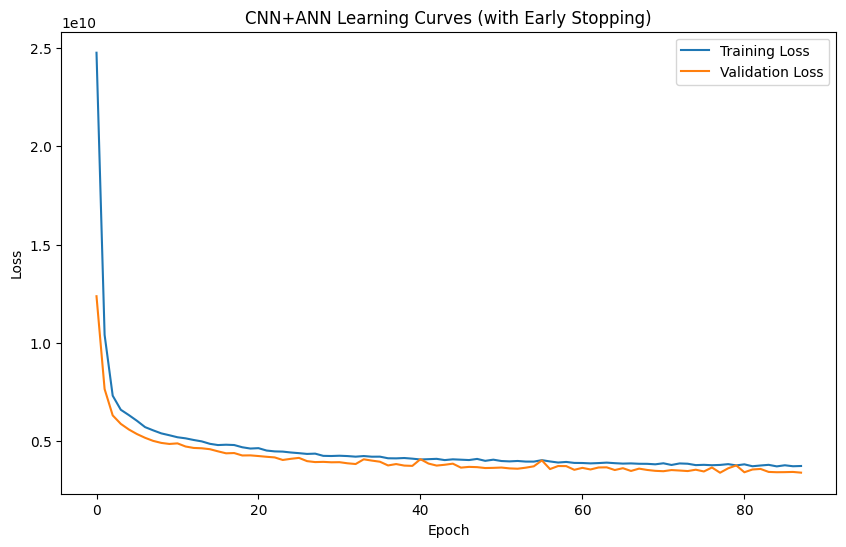

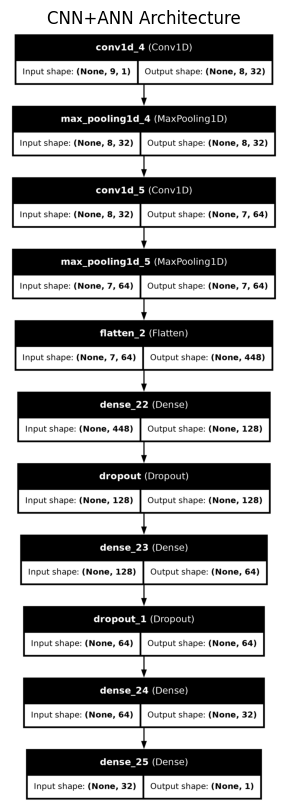

In [51]:
print("\nTraining CNN+ANN with Early Stopping to Prevent Overfitting:")
cnn_ann_model_early_stopping = create_cnn_ann_model(overfitting=False)
train_and_plot(cnn_ann_model_early_stopping, X_train_cnn, y_train, "CNN+ANN", with_early_stopping=True)

## Comparison of all models


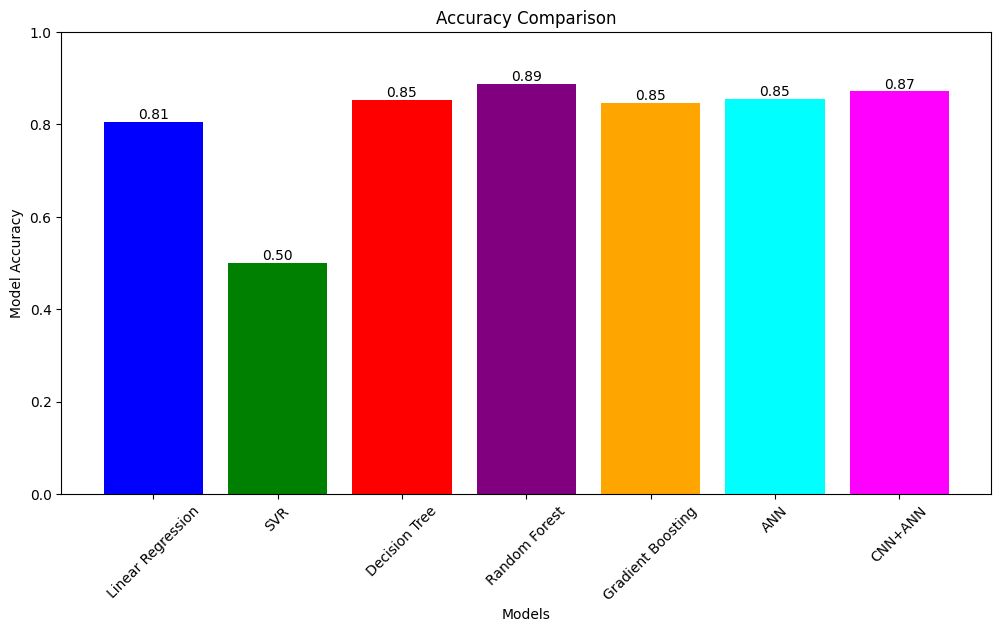

In [52]:
models = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'ANN', 'CNN+ANN']
accuracy = [accuracy_lr, accuracy_svr, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_ann, accuracy_1d_cnn]
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# CONCLUSION:

### Highest Accuracy: 
The Random Forest model achieves the highest accuracy among all the models, with a score of approximately 0.89.
### Close Contenders: 
The CNN+ANN and Gradient Boosting models also exhibit strong performance, with accuracy scores slightly below the Random Forest.
### Middling Performance: 
The Decision Tree, Linear Regression, and SVR models demonstrate moderate accuracy, ranging between 0.8 and 0.85.
### Lowest Accuracy: 
The ANN model has the lowest accuracy among the compared models, with a score around 0.85.